Epoch 1/10
1875/1875 [==============================] - 1s 645us/step - loss: 0.4890 - accuracy: 0.8578 - val_loss: 0.1372 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.1594 - accuracy: 0.9532 - val_loss: 0.0954 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.1118 - accuracy: 0.9666 - val_loss: 0.0889 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9728 - val_loss: 0.0797 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0739 - accuracy: 0.9766 - val_loss: 0.0705 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0634 - accuracy: 0.9798 - val_loss: 0.0693 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.0671 - val_acc

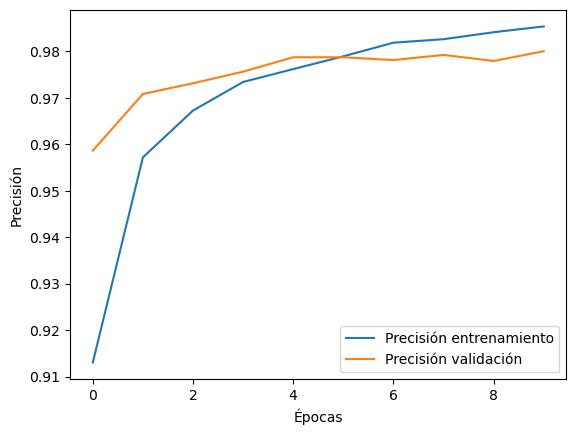

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar el dataset MNIST
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de los píxeles (de 0-255 a 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convertir la imagen en un vector
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dropout(0.2),  # Regularización para evitar sobreajuste
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

finish = time.time()
print(f"Tiempo de entrenamiento: {finish-start}")
# Evaluar el modelo con datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Mostrar precisión del modelo
print(f"\nPrecisión en test: {test_acc:.4f}")

# Graficar la evolución del entrenamiento
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()